In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('delta.dat', 'r') as f:
     data = f.readlines()

In [3]:
# Plot dimmensions:
p_width = 16
p_heigth = 8

# Initial values
lag = 0
delta = 0
plot_i = []
plot_lag = []
plot_delta = []
plot_extrapol = []
plot_wind = []
for i, line in enumerate(data):
    dvalues = line.split()
    if len(dvalues) > 2 and dvalues[1].strip('-').strip('+').isnumeric() == True:
        #print(dvalues)
        lag = dvalues[1].strip('+?').lstrip('?')
        delta = dvalues[2].strip('+').lstrip('?')
        #print(i, lag, delta)
        plot_i.append(i)
        plot_lag.append(lag)
        plot_delta.append(delta)
        if len(dvalues) > 4:
            #print(dvalues)
            plot_extrapol.append(1)
        else:
            plot_extrapol.append(0)
        if dvalues[3] == "+":
            plot_wind.append(-1)
        elif dvalues[3] == "++":
            plot_wind.append(1)
        elif dvalues[3] == "+/-":
            plot_wind.append(-3)

In [4]:
# Differentiate for measured and extrapolated data:
plot_lag_true = []
plot_lag_xtpl = []
plot_delta_true = []
plot_delta_xtpl = []
plot_i_true = []
plot_i_xtpl = []
for i in range(len(plot_i)):
    #print(plot_i[i], plot_lag[i], plot_extrapol[i])
    if plot_extrapol[i] == 0:
        plot_lag_true.append(plot_lag[i])
        plot_delta_true.append(plot_delta[i])
        plot_i_true.append(plot_i[i])
    elif plot_extrapol[i] == 1:
        plot_lag_xtpl.append(plot_lag[i])
        plot_delta_xtpl.append(plot_delta[i])
        plot_i_xtpl.append(plot_i[i])

In [5]:
# Convert lists to numpy arrays
plot_i = np.asarray(plot_i)
plot_i = plot_i.astype(np.int64)
plot_lag = np.asarray(plot_lag)
plot_lag = plot_lag.astype(np.int64)
plot_delta = np.asarray(plot_delta)
plot_delta = plot_delta.astype(np.int64)
plot_zero = np.zeros(len(plot_delta), dtype=np.int64)
plot_lag_true = np.asanyarray(plot_lag_true, dtype=np.int64)
plot_lag_xtpl = np.asanyarray(plot_lag_xtpl, dtype=np.int64)
plot_i_true = np.asanyarray(plot_i_true, dtype=np.int64)
plot_i_xtpl = np.asanyarray(plot_i_xtpl, dtype=np.int64)
plot_delta_true = np.asanyarray(plot_delta_true, dtype=np.int64)
plot_delta_xtpl = np.asanyarray(plot_delta_xtpl, dtype=np.int64)
plot_wind = np.asanyarray(plot_wind, dtype=np.int64)

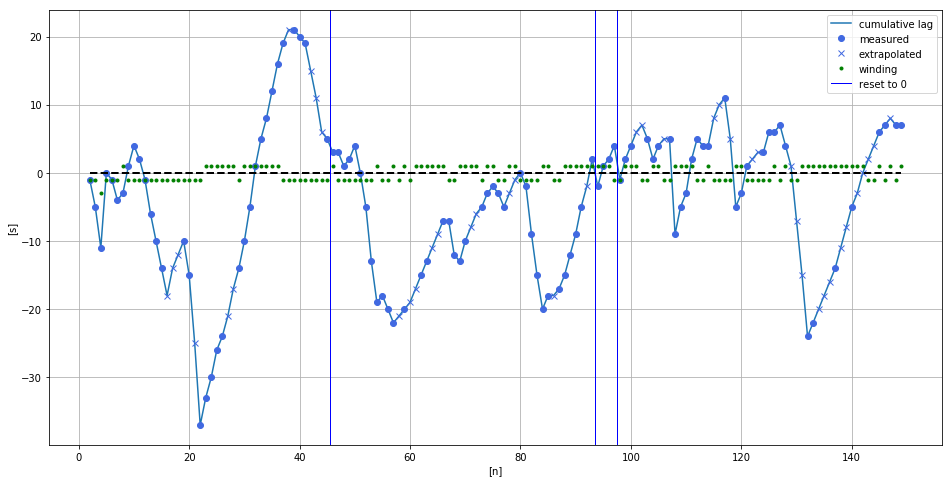

In [6]:
plt.rcParams['figure.figsize'] = [p_width, p_heigth]
plt.plot(plot_i, plot_lag, label='cumulative lag')
plt.plot(plot_i_true, plot_lag_true, label='measured',color='royalblue', marker='o', linewidth=0)
plt.plot(plot_i_xtpl, plot_lag_xtpl, label='extrapolated',color='royalblue', marker='x', linewidth=0)
plt.plot(plot_i, plot_zero, color='black', linestyle='dashed', linewidth=2)
plt.plot(plot_i, plot_wind, label='winding', color='green', marker='.', linewidth=0)
# Manually added timestamp for reset:
plt.axvline(x=45.5, linewidth=1, color='b', label='reset to 0')
plt.axvline(x=93.5, linewidth=1, color='b')
plt.axvline(x=97.5, linewidth=1, color='b')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.grid(True)
plt.show()

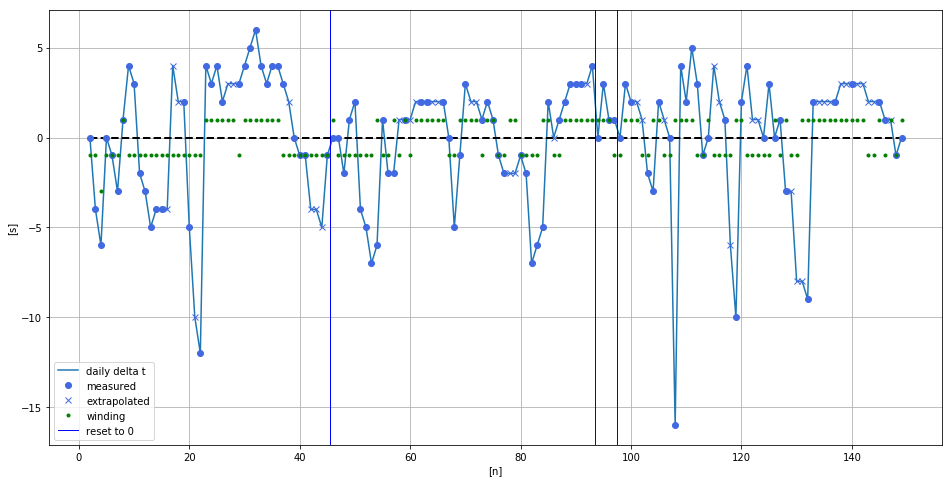

In [7]:
plt.rcParams['figure.figsize'] = [p_width, p_heigth]
plt.plot(plot_i, plot_delta, label='daily delta t')
plt.plot(plot_i, plot_zero, color='black', linestyle='dashed', linewidth=2)
plt.plot(plot_i_true, plot_delta_true, label='measured',color='royalblue', marker='o', linewidth=0)
plt.plot(plot_i_xtpl, plot_delta_xtpl, label='extrapolated',color='royalblue', marker='x', linewidth=0)
plt.plot(plot_i, plot_wind, label='winding', color='green', marker='.', linewidth=0)
# Manually added timestamp for reset:
plt.axvline(x=45.5, linewidth=1, color='b', label='reset to 0')
plt.axvline(x=93.5, linewidth=1, color='b')
plt.axvline(x=97.5, linewidth=1, color='b')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
deriv = np.gradient(plot_lag)

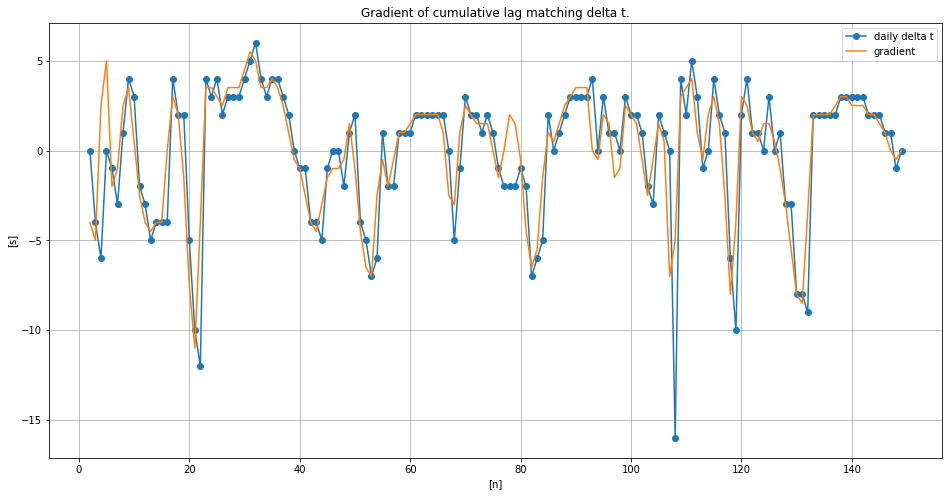

In [9]:
plt.rcParams['figure.figsize'] = [p_width, p_heigth]
plt.plot(plot_i, plot_delta, label='daily delta t', marker='o')
plt.plot(plot_i, deriv, label='gradient')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.title("Gradient of cumulative lag matching delta t.")
plt.grid(True)
plt.show()